In [5]:
## IMporting Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [27]:
##data preprocessing and collection
df = pd.read_csv('carPrice.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [8]:
df.shape

(4340, 8)

In [9]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [19]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [16]:
print(df.fuel.value_counts)
print(df.transmission.value_counts)
print(df.seller_type.value_counts)

<bound method IndexOpsMixin.value_counts of 0       Petrol
1       Petrol
2       Diesel
3       Petrol
4       Diesel
         ...  
4335    Diesel
4336    Diesel
4337    Petrol
4338    Diesel
4339    Petrol
Name: fuel, Length: 4340, dtype: object>
<bound method IndexOpsMixin.value_counts of 0       Manual
1       Manual
2       Manual
3       Manual
4       Manual
         ...  
4335    Manual
4336    Manual
4337    Manual
4338    Manual
4339    Manual
Name: transmission, Length: 4340, dtype: object>
<bound method IndexOpsMixin.value_counts of 0       Individual
1       Individual
2       Individual
3       Individual
4       Individual
           ...    
4335    Individual
4336    Individual
4337    Individual
4338    Individual
4339    Individual
Name: seller_type, Length: 4340, dtype: object>


In [60]:
##Encoding the categorical data
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}}, inplace=True)
#encoding the seller_type
df.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}}, inplace=True)
#encoding the transmission
df.replace({'transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [61]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,0,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,0,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,0,1,0,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,0,First Owner


In [68]:
#splitting into training and test data
x = df.drop(['name','selling_price','owner'],axis = 1)
y = df['selling_price']

In [69]:
print(x,y)

      year  km_driven  fuel  seller_type  transmission
0     2007      70000     0            1             0
1     2007      50000     0            1             0
2     2012     100000     1            1             0
3     2017      46000     0            1             0
4     2014     141000     1            1             0
...    ...        ...   ...          ...           ...
4335  2014      80000     1            1             0
4336  2014      80000     1            1             0
4337  2009      83000     0            1             0
4338  2016      90000     1            1             0
4339  2016      40000     0            1             0

[4340 rows x 5 columns] 0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

In [71]:
print(x.shape,x_train.shape,x_test.shape)

(4340, 5) (3472, 5) (868, 5)


In [72]:
lin_reg_model= LinearRegression()

In [73]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [74]:
##model evaluTION
training_data_prediction = lin_reg_model.predict(x_train)

In [75]:
#R squared error
error_score = metrics.r2_score(y_train,training_data_prediction)
print(error_score)

0.4467276597993395


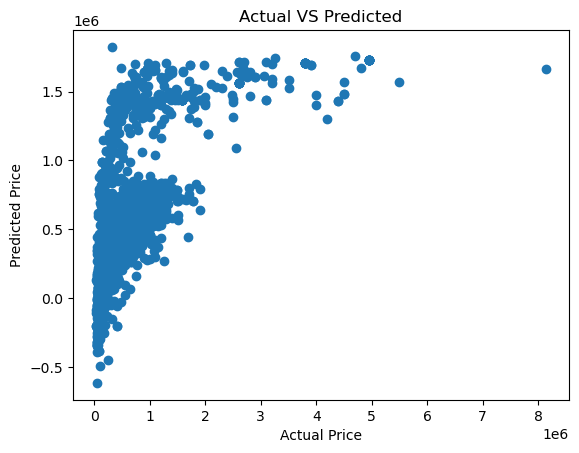

In [76]:
## Visualize the predicted data
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted")
plt.show()

In [77]:
test_data_prediction = lin_reg_model.predict(x_test)

In [78]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print(error_score)

0.3805770092376549


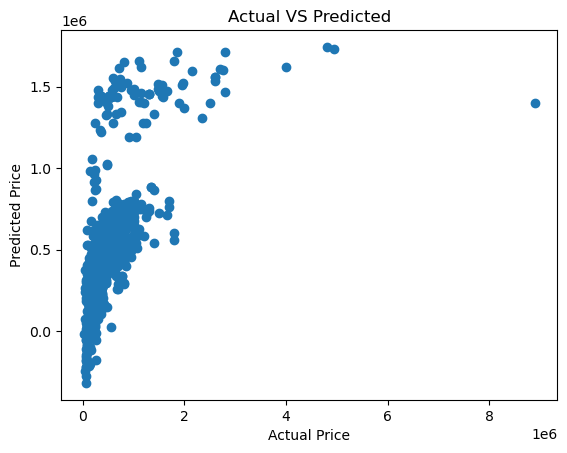

In [79]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted")
plt.show()

In [81]:
lassi_reg_model = Lasso()

In [82]:
lassi_reg_model.fit(x_train,y_train)

Lasso()

In [83]:
training_data_prediction = lassi_reg_model.predict(x_train)

In [84]:
error_score = metrics.r2_score(y_train,training_data_prediction)
print(error_score)

0.4467276597511085
